In [1]:
import pandas as pd


In [3]:
poltava20_4 = pd.read_pickle("Poltava2020_ehealth_50days.pkl")

In [4]:
poltava19.shape

(269706, 22)

In [38]:
poltava20.shape

(63644, 22)

In [4]:
poltava20_4.shape

(64394, 64)

In [5]:
names_list = poltava20_4.columns.values.tolist()
names_list

['index',
 'Hospital_ID',
 'Reporting_Month',
 'Data_Source',
 'Record_ID',
 'Type_of_Referral',
 'Finance_Program',
 'Referral_ID',
 'Position_of_Doctor_Who_Gave_Referral',
 'ID_of_Paper_Referral',
 'System_Input_Date',
 'Hospitalization_Visit_Date',
 'Discharge_Date',
 'Stationary/Ambulatory',
 'Episode_ID',
 'Episode_Type',
 'Medical_Record_Status',
 'Type_of_Care',
 'Urgency',
 'Main_Diagnosis_Code',
 'Main_Diagnosis',
 'Chronical_Illness',
 'Additiona_Diagnosis_Codes',
 'Assitional_Diagnosis',
 'Medical_Procedures_Codes',
 'Procedures',
 'Comment_to_Procedures',
 'Doctor',
 'Doctor_Position',
 'Diagnostic_Report_Date',
 'Diagnostic_Report_ID',
 'Medical_Services_Of_Diagnostic_Report_Codes',
 'Medical_Services_of_Diagnostic_Report',
 'Doctor_Position_of_Diagnostic_Report',
 'Doctor_of_Diagnostic_Report',
 'Date_of_Procedure',
 'Procedure_ID',
 'Services_of_Procedures_Codes',
 'Services_of_Procedures',
 'Doctor_Position_Procedures',
 'Doctor_Procedures',
 'Number_of_Diagnostic_Repor

In [8]:
print(poltava20_4.loc[:, ['Hospitalization_Visit_Date', 'Discharge_Date', 'Days_In_Hospital']].iloc[:5,:])

      Hospitalization_Visit_Date      Discharge_Date  Days_In_Hospital
29778                 2020-08-25 2020-08-14 11:00:00         -9.541667
29776                 2020-11-20 2020-08-14 11:00:00        -96.541667
29777                 2020-09-29 2020-08-13 08:53:35        -45.629456
20080                 2020-08-25 2020-09-02 10:35:05          9.441030
20056                 2020-07-03 2020-07-20 09:17:27         18.387118


In [10]:
poltava20_4 = poltava20_4[poltava20_4['Days_In_Hospital'] >=0]
print(poltava20_4.shape)

(63765, 64)


In [ ]:
df = poltava20_4
ids = df["code_of_entry"]
df[ids.isin(ids[ids.duplicated()])].sort_values("code_of_entry")

In [ ]:
#df['range'] = df['range'].str.replace(',','-')
#poltava20['дата введення форми 066/o в систему'] = poltava20['дата введення форми 066/o в систему'].str.replace('2020','20')

In [40]:
poltava20_4['hospitalization date'] = pd.to_datetime(poltava20['hospitalization date'])
poltava20['discharge date'] = pd.to_datetime(poltava20['discharge date'])

In [ ]:
print()

In [44]:
import string
import re
def get_first_symbol(str):
    for char in str:
        #if (char in string.ascii_letters) or (char is char.isalpha()):
        #if (bool(re.match('[а-яА-Я]', str))) or (char is char.isalpha()):
        if char not in ["'", '"', "-"]:
            return char

In [45]:
def get_first_letters(string):
    string = string.replace('"', '')
    list_of_strings = string.split()
    s = ""
    for n in range(1, len(list_of_strings)):
        
        s = s + get_first_symbol(list_of_strings[n])
    return list_of_strings[0] + "_" + s

In [46]:
poltava20['HospitalAbb'] = poltava20['Hospital'].apply(get_first_letters)

In [47]:
print(poltava20['HospitalAbb'].unique())

['КНМП_КМДЛ' 'КП_ДМКЛПМР' 'КП_МКПБПМР' 'КНМП_ЛВЛ'
 'КП_ОКЛВЛТДЗОЦПСТРЛМГПОР' 'КП_1МКЛПМР' 'КП_2МКЛПМР' 'КП_3МКЛПМР'
 'КП_4МКЛПМР' 'КП_5МКЛПМР' 'КНП_ЛІЛІРМГПГМРПО' 'КМП_ЛП' 'КНМП_КПМЛІ'
 'КНМП_КМЛП' 'КНМП_ЛІЛК' 'КП_ПОДКЛПОР' 'КП_ПОКІЛПОР' 'КП_КОНДПОР'
 'КП_ЛОНДПОР' 'КП_ПОНДПОР' 'КП_ПОКШДПОР' 'КП_ПОКЛІМПОР' 'КНМП_КПЦІР'
 'КП_ЛЛІЛЛМР' 'КНП_ВЦРЛВРРПО' 'КНП_ГЦРЛГРР' 'КНМП_ГЦРЛГРРПО'
 'КНП_ГЦРЛГРРПО' 'КНП_ДЛПЛДРР' 'КНП_ЗЦРЛЗРРПО' 'КНП_КЦРЛІР'
 'КНП_КЦРЛКРРПО' 'КНП_КЦРЛКРР' 'КНП_КРРКЦРЛ' 'КНП_ЛРЛЛРР' 'КНП_МЦРЛМРРПО'
 'КНП_МЦРЛМРР' 'КНП_НЦРЛНРРПО' 'КНП_ОЦРЛОРРПО' 'КП_ПЦРЛПРР' 'КНП_ПЦРКЛПРР'
 'КНП_РЦРЛРРРПО' 'КП_СЦРЛСРР' 'КНП_ХЦРЛХРРПО' 'КНП_ЧРЛЧРРПО' 'КНП_ЧЦРЛ'
 'КНП_ШЦРЛШРРПО']


In [52]:
poltava20["id"] = poltava20["id"].astype(str)

In [53]:
poltava20['hospital_id'] = poltava20["id"] + "_" + poltava20["HospitalAbb"]


In [54]:
poltava20 = poltava20.rename(columns={'код запису':'code_of_entry'})

In [55]:
print(poltava20.shape)
poltava20_1 = poltava20.drop_duplicates(subset=['code_of_entry'])
print(poltava20_1.shape)

(63644, 24)
(51532, 24)


In [12]:
df = poltava20_4
ids = df["Record_ID"]
df[ids.isin(ids[ids.duplicated()])].sort_values("Record_ID")

,index,Hospital_ID,Reporting_Month,Data_Source,Record_ID,Type_of_Referral,Finance_Program,Referral_ID,Position_of_Doctor_Who_Gave_Referral,ID_of_Paper_Referral,...,Result_of_Care,Errors_in_Grouping,Patient_ID,Days_In_Hospital,Hospitalization_Month,Hospitalization_Date,Discharge_Month,Discharge_Day,Discharge_Year,Hospitalization_Day


In [13]:
poltavaD = poltava20_4.loc[:, ['Record_ID', 'Hospitalization_Visit_Date', 'Discharge_Date']]
df = poltavaD
df['Hospitalization_Visit_Date'] = pd.to_datetime(df['Hospitalization_Visit_Date'])
df['Discharge_Date'] = pd.to_datetime(df['Discharge_Date'])

df2 = pd.melt(df, id_vars='Record_ID', value_name='Date')
df2.Date = pd.to_datetime(df2.Date)
df2.set_index('Date', inplace=True)
df2.drop('variable', axis=1, inplace=True)
df3 = df2.groupby('Record_ID').resample('D').ffill().reset_index(level=0, drop=True)
print(df3)

                                       Record_ID
Date                                            
2020-09-10                                   NaN
2020-09-11  00030933-8931-4e8c-a7da-a9aa5877fa17
2020-09-12  00030933-8931-4e8c-a7da-a9aa5877fa17
2020-09-13  00030933-8931-4e8c-a7da-a9aa5877fa17
2020-09-14  00030933-8931-4e8c-a7da-a9aa5877fa17
...                                          ...
2020-04-11                                 s9970
2020-04-12                                 s9970
2020-04-13                                 s9970
2020-04-14                                 s9970
2020-04-24                                 s9985

[484672 rows x 1 columns]


In [14]:
df3 = df3.reset_index()

In [15]:
df4 = pd.merge(df, df3)

In [16]:
df4

,Record_ID,Hospitalization_Visit_Date,Discharge_Date,Date
0,71525aee-ded9-4017-ac4b-40b441407523,2020-08-25 00:00:00,2020-09-02 10:35:05,2020-08-25
1,71525aee-ded9-4017-ac4b-40b441407523,2020-08-25 00:00:00,2020-09-02 10:35:05,2020-08-26
2,71525aee-ded9-4017-ac4b-40b441407523,2020-08-25 00:00:00,2020-09-02 10:35:05,2020-08-27
3,71525aee-ded9-4017-ac4b-40b441407523,2020-08-25 00:00:00,2020-09-02 10:35:05,2020-08-28
4,71525aee-ded9-4017-ac4b-40b441407523,2020-08-25 00:00:00,2020-09-02 10:35:05,2020-08-29
...,...,...,...,...
440680,7f972f39-01c0-474f-92bf-5fe8f69b4232,2021-01-12 02:00:00,2021-01-13 14:09:00,2021-01-13
440681,9b26a69b-a1fe-4a9b-a2b4-a789d6839e85,2021-01-12 02:00:00,2021-01-13 13:53:00,2021-01-13
440682,128c8f96-2164-4614-bf19-2fb8b39b7406,2021-01-12 02:00:00,2021-01-13 12:49:43,2021-01-13
440683,cb57e688-26c7-449f-91bd-b2f8e91d7f4d,2021-01-12 02:00:00,2021-01-13 16:41:04,2021-01-13


In [17]:
df4 = pd.merge(df3, poltava20_4)

In [18]:
pdays20_4 = df4

In [19]:
print(pdays20_4.head())

        Date                             Record_ID   index  Hospital_ID  \
0 2020-09-11  00030933-8931-4e8c-a7da-a9aa5877fa17  137890      1999307   
1 2020-09-12  00030933-8931-4e8c-a7da-a9aa5877fa17  137890      1999307   
2 2020-09-13  00030933-8931-4e8c-a7da-a9aa5877fa17  137890      1999307   
3 2020-09-14  00030933-8931-4e8c-a7da-a9aa5877fa17  137890      1999307   
4 2020-09-15  00030933-8931-4e8c-a7da-a9aa5877fa17  137890      1999307   

  Reporting_Month Data_Source Type_of_Referral Finance_Program Referral_ID  \
0        вересень     EHEALTH  Без направлення             NaN         NaN   
1        вересень     EHEALTH  Без направлення             NaN         NaN   
2        вересень     EHEALTH  Без направлення             NaN         NaN   
3        вересень     EHEALTH  Без направлення             NaN         NaN   
4        вересень     EHEALTH  Без направлення             NaN         NaN   

  Position_of_Doctor_Who_Gave_Referral  ...         Result_of_Care  \
0         

In [21]:
pdays20_4.to_pickle("Poltava2020_4_days_all.pkl")

In [22]:
print(poltava20_4['Main_Diagnosis_Code'][:5])

20080     I20.8
20056    K29.90
20224     J15.8
29774     B19.9
29780     B19.9
Name: Main_Diagnosis_Code, dtype: object


In [23]:
print(poltava20_4['Main_Diagnosis'][:5])

20080                               Інші форми стенокардії
20056    Гастродуоденіт, неуточнений, множинні локалізації
20224                          Інша бактеріальна пневмонія
29774     Неуточнений вірусний гепатит без печінкової коми
29780     Неуточнений вірусний гепатит без печінкової коми
Name: Main_Diagnosis, dtype: object


In [72]:
import numpy as np
def get_upcode(code, level):
    if (len(code) < 6) and (code.find('.') != -1):
        code = code + '0'
    if len(code) == 3:
        code = code + ".00"
    try:
        upcode = desease_codes_nested[code][level]
    except KeyError:
        code = code[:3] + '.00'
        upcode = desease_codes_nested.get(code, np.nan)
        if isinstance(upcode,dict):
            upcode = upcode[level]
    return upcode

In [78]:
def get_code_name(code):
    if isinstance(code, (float, int)):
        return np.nan
    if (len(code) < 6) and (code.find('.') != -1):
        code = code + '0'
    try:
        code_name = desease_codes_names[code]
    except KeyError:
        code = code[:3] + '.00'
        code_name = desease_codes_names.get(code, np.nan)
    return code_name

In [68]:
a = np.nan
if np.isnan(a):
    print('Yes')

Yes


In [3]:
import pickle

#desease_codes_nested = codes_nested_all

#with open('desease_codes_nested.pickle', 'wb') as handle:
    #pickle.dump(desease_codes_nested, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('../mydata/desease_codes_nested.pickle', 'rb') as handle:
    desease_codes_nested = pickle.load(handle)


In [56]:
for k,v in desease_codes_nested.items():
    print(v['L1'])

A00-B99
A00-B99
A00-B99
A00-B99
A00-B99
A00-B99
A00-B99
A00-B99
A00-B99
A00-B99
A00-B99
A00-B99
A00-B99
A00-B99
A00-B99
A00-B99
A00-B99
A00-B99
A00-B99
A00-B99
A00-B99
A00-B99
A00-B99
A00-B99
A00-B99
A00-B99
A00-B99
A00-B99
A00-B99
A00-B99
A00-B99
A00-B99
A00-B99
A00-B99
A00-B99
A00-B99
A00-B99
A00-B99
A00-B99
A00-B99
A00-B99
A00-B99
A00-B99
A00-B99
A00-B99
A00-B99
A00-B99
A00-B99
A00-B99
A00-B99
A00-B99
A00-B99
A00-B99
A00-B99
A00-B99
A00-B99
A00-B99
A00-B99
A00-B99
A00-B99
A00-B99
A00-B99
A00-B99
A00-B99
A00-B99
A00-B99
A00-B99
A00-B99
A00-B99
A00-B99
A00-B99
A00-B99
A00-B99
A00-B99
A00-B99
A00-B99
A00-B99
A00-B99
A00-B99
A00-B99
A00-B99
A00-B99
A00-B99
A00-B99
A00-B99
A00-B99
A00-B99
A00-B99
A00-B99
A00-B99
A00-B99
A00-B99
A00-B99
A00-B99
A00-B99
A00-B99
A00-B99
A00-B99
A00-B99
A00-B99
A00-B99
A00-B99
A00-B99
A00-B99
A00-B99
A00-B99
A00-B99
A00-B99
A00-B99
A00-B99
A00-B99
A00-B99
A00-B99
A00-B99
A00-B99
A00-B99
A00-B99
A00-B99
A00-B99
A00-B99
A00-B99
A00-B99
A00-B99
A00-B99
A00-B99


D50-D89
D50-D89
D50-D89
D50-D89
D50-D89
D50-D89
D50-D89
D50-D89
D50-D89
D50-D89
D50-D89
D50-D89
D50-D89
D50-D89
D50-D89
D50-D89
D50-D89
D50-D89
D50-D89
D50-D89
D50-D89
D50-D89
D50-D89
D50-D89
D50-D89
D50-D89
D50-D89
D50-D89
D50-D89
D50-D89
D50-D89
D50-D89
D50-D89
D50-D89
D50-D89
D50-D89
D50-D89
D50-D89
D50-D89
D50-D89
D50-D89
D50-D89
D50-D89
D50-D89
D50-D89
D50-D89
D50-D89
D50-D89
D50-D89
D50-D89
D50-D89
D50-D89
D50-D89
D50-D89
D50-D89
D50-D89
D50-D89
D50-D89
D50-D89
D50-D89
D50-D89
D50-D89
D50-D89
D50-D89
D50-D89
D50-D89
D50-D89
D50-D89
D50-D89
D50-D89
D50-D89
D50-D89
D50-D89
D50-D89
D50-D89
E00-E99
E00-E99
E00-E99
E00-E99
E00-E99
E00-E99
E00-E99
E00-E99
E00-E99
E00-E99
E00-E99
E00-E99
E00-E99
E00-E99
E00-E99
E00-E99
E00-E99
E00-E99
E00-E99
E00-E99
E00-E99
E00-E99
E00-E99
E00-E99
E00-E99
E00-E99
E00-E99
E00-E99
E00-E99
E00-E99
E00-E99
E00-E99
E00-E99
E00-E99
E00-E99
E00-E99
E00-E99
E00-E99
E00-E99
E00-E99
E00-E99
E00-E99
E00-E99
E00-E99
E00-E99
E00-E99
E00-E99
E00-E99
E00-E99
E00-E99


H00-H59
H00-H59
H00-H59
H00-H59
H00-H59
H00-H59
H00-H59
H00-H59
H00-H59
H00-H59
H00-H59
H00-H59
H00-H59
H00-H59
H00-H59
H00-H59
H00-H59
H00-H59
H00-H59
H00-H59
H00-H59
H00-H59
H00-H59
H00-H59
H00-H59
H00-H59
H00-H59
H00-H59
H00-H59
H00-H59
H00-H59
H00-H59
H00-H59
H00-H59
H00-H59
H00-H59
H00-H59
H00-H59
H00-H59
H00-H59
H00-H59
H00-H59
H00-H59
H00-H59
H00-H59
H00-H59
H00-H59
H00-H59
H00-H59
H00-H59
H00-H59
H00-H59
H00-H59
H00-H59
H00-H59
H00-H59
H00-H59
H00-H59
H00-H59
H00-H59
H00-H59
H00-H59
H00-H59
H00-H59
H00-H59
H00-H59
H00-H59
H00-H59
H00-H59
H00-H59
H00-H59
H00-H59
H00-H59
H00-H59
H00-H59
H00-H59
H00-H59
H00-H59
H00-H59
H00-H59
H00-H59
H00-H59
H00-H59
H00-H59
H00-H59
H00-H59
H00-H59
H00-H59
H00-H59
H00-H59
H00-H59
H00-H59
H00-H59
H00-H59
H00-H59
H00-H59
H00-H59
H00-H59
H00-H59
H00-H59
H00-H59
H00-H59
H00-H59
H00-H59
H00-H59
H00-H59
H00-H59
H00-H59
H00-H59
H00-H59
H00-H59
H00-H59
H00-H59
H00-H59
H00-H59
H00-H59
H00-H59
H00-H59
H00-H59
H00-H59
H00-H59
H00-H59
H00-H59
H00-H59
H00-H59


M00-M99
M00-M99
M00-M99
M00-M99
M00-M99
M00-M99
M00-M99
M00-M99
M00-M99
M00-M99
M00-M99
M00-M99
M00-M99
M00-M99
M00-M99
M00-M99
M00-M99
M00-M99
M00-M99
M00-M99
M00-M99
M00-M99
M00-M99
M00-M99
M00-M99
M00-M99
M00-M99
M00-M99
M00-M99
M00-M99
M00-M99
M00-M99
M00-M99
M00-M99
M00-M99
M00-M99
M00-M99
M00-M99
M00-M99
M00-M99
M00-M99
M00-M99
M00-M99
M00-M99
M00-M99
M00-M99
M00-M99
M00-M99
M00-M99
M00-M99
M00-M99
M00-M99
M00-M99
M00-M99
M00-M99
M00-M99
M00-M99
M00-M99
M00-M99
M00-M99
M00-M99
M00-M99
M00-M99
M00-M99
M00-M99
M00-M99
M00-M99
M00-M99
M00-M99
M00-M99
M00-M99
M00-M99
M00-M99
M00-M99
M00-M99
M00-M99
M00-M99
M00-M99
M00-M99
M00-M99
M00-M99
M00-M99
M00-M99
M00-M99
M00-M99
M00-M99
M00-M99
M00-M99
M00-M99
M00-M99
M00-M99
M00-M99
M00-M99
M00-M99
M00-M99
M00-M99
M00-M99
M00-M99
M00-M99
M00-M99
M00-M99
M00-M99
M00-M99
M00-M99
M00-M99
M00-M99
M00-M99
M00-M99
M00-M99
M00-M99
M00-M99
M00-M99
M00-M99
M00-M99
M00-M99
M00-M99
M00-M99
M00-M99
M00-M99
M00-M99
M00-M99
M00-M99
M00-M99
M00-M99
M00-M99


Q00-Q99
Q00-Q99
Q00-Q99
Q00-Q99
Q00-Q99
Q00-Q99
Q00-Q99
Q00-Q99
Q00-Q99
Q00-Q99
Q00-Q99
Q00-Q99
Q00-Q99
Q00-Q99
Q00-Q99
Q00-Q99
Q00-Q99
Q00-Q99
Q00-Q99
Q00-Q99
Q00-Q99
Q00-Q99
Q00-Q99
Q00-Q99
Q00-Q99
Q00-Q99
Q00-Q99
Q00-Q99
Q00-Q99
Q00-Q99
Q00-Q99
Q00-Q99
Q00-Q99
Q00-Q99
Q00-Q99
Q00-Q99
Q00-Q99
Q00-Q99
Q00-Q99
Q00-Q99
Q00-Q99
Q00-Q99
Q00-Q99
Q00-Q99
Q00-Q99
Q00-Q99
Q00-Q99
Q00-Q99
Q00-Q99
Q00-Q99
Q00-Q99
Q00-Q99
Q00-Q99
Q00-Q99
Q00-Q99
Q00-Q99
Q00-Q99
Q00-Q99
Q00-Q99
Q00-Q99
Q00-Q99
Q00-Q99
Q00-Q99
Q00-Q99
Q00-Q99
Q00-Q99
Q00-Q99
Q00-Q99
Q00-Q99
Q00-Q99
Q00-Q99
Q00-Q99
Q00-Q99
Q00-Q99
Q00-Q99
Q00-Q99
Q00-Q99
Q00-Q99
Q00-Q99
Q00-Q99
R00-R99
R00-R99
R00-R99
R00-R99
R00-R99
R00-R99
R00-R99
R00-R99
R00-R99
R00-R99
R00-R99
R00-R99
R00-R99
R00-R99
R00-R99
R00-R99
R00-R99
R00-R99
R00-R99
R00-R99
R00-R99
R00-R99
R00-R99
R00-R99
R00-R99
R00-R99
R00-R99
R00-R99
R00-R99
R00-R99
R00-R99
R00-R99
R00-R99
R00-R99
R00-R99
R00-R99
R00-R99
R00-R99
R00-R99
R00-R99
R00-R99
R00-R99
R00-R99
R00-R99
R00-R99


S00-T99
S00-T99
S00-T99
S00-T99
S00-T99
S00-T99
S00-T99
S00-T99
S00-T99
S00-T99
S00-T99
S00-T99
S00-T99
S00-T99
S00-T99
S00-T99
S00-T99
S00-T99
S00-T99
S00-T99
S00-T99
S00-T99
S00-T99
S00-T99
S00-T99
S00-T99
S00-T99
S00-T99
S00-T99
S00-T99
S00-T99
S00-T99
S00-T99
S00-T99
S00-T99
S00-T99
S00-T99
S00-T99
S00-T99
S00-T99
S00-T99
S00-T99
S00-T99
S00-T99
S00-T99
S00-T99
S00-T99
S00-T99
S00-T99
S00-T99
S00-T99
S00-T99
S00-T99
S00-T99
S00-T99
S00-T99
S00-T99
S00-T99
S00-T99
S00-T99
S00-T99
S00-T99
S00-T99
S00-T99
S00-T99
S00-T99
S00-T99
S00-T99
S00-T99
S00-T99
S00-T99
S00-T99
S00-T99
S00-T99
S00-T99
S00-T99
S00-T99
S00-T99
S00-T99
S00-T99
S00-T99
S00-T99
S00-T99
S00-T99
S00-T99
S00-T99
S00-T99
S00-T99
S00-T99
S00-T99
S00-T99
S00-T99
S00-T99
S00-T99
S00-T99
S00-T99
S00-T99
S00-T99
S00-T99
S00-T99
S00-T99
S00-T99
S00-T99
S00-T99
S00-T99
S00-T99
S00-T99
S00-T99
S00-T99
S00-T99
S00-T99
S00-T99
S00-T99
S00-T99
S00-T99
S00-T99
S00-T99
S00-T99
S00-T99
S00-T99
S00-T99
S00-T99
S00-T99
S00-T99
S00-T99


In [4]:

with open('../mydata/desease_codes_names.pickle', 'rb') as handle:
    desease_codes_names = pickle.load(handle)

In [32]:
pdays20_4_codes = pdays20_4['Main_Diagnosis_Code'].unique().tolist()
for code in pdays20_4_codes:
    if code[0] == 'U':
        print(code)

U07.1
U07.2
U78.1
U82.1
U87.1
U78.2
U07.0


In [5]:
U71_dict = {'U07.10':  {'L3': 'U07', 'L2': 'U00-U49', 'L1': 'U00-U85'}}
U72_dict = {'U07.20':  {'L3': 'U07', 'L2': 'U00-U49', 'L1': 'U00-U85'}}
U70_dict = {'U07.20':  {'L3': 'U07', 'L2': 'U00-U49', 'L1': 'U00-U85'}}
U781_dict = {'U78.10':  {'L3': 'U78', 'L2': 'U78-U88', 'L1': 'U78-U88'}}
U782_dict = {'U78.20':  {'L3': 'U78', 'L2': 'U78-U88', 'L1': 'U78-U88'}}
U821_dict = {'U82.10':  {'L3': 'U82', 'L2': 'U78-U88', 'L1': 'U78-U88'}}
U871_dict = {'U87.10':  {'L3': 'U87', 'L2': 'U78-U88', 'L1': 'U78-U88'}}

U78L1_name = {"U78-U88": "Додаткові коди для хронічних станів"}
U781L4_name = {"U78.10": "Ожиріння ІМТ ≥ 30,00 кг/м2"}
U782L4_name = {"U78.20": "Муковісцидоз"}
U821L4_name = {"U82.10": "Ішемічна хвороба серця. Коронарна недостатність"}
U871L4_name = {"U87.10": "Хронічна ниркова недостатність, стадія 3-5"}
U78L3_name = {"U78": " Ендокринні хвороби, розлади харчування та порушення обміну речовин"}
U82L3_name = {"U82": "Хвороби системи кровообігу"}
U87L3_name = {"U87": "Хвороби сечостатевої системи"}
U7L1_name = {"U00-U85": "Коди для особливих цілей"}
U7L2_name = {"U00-U49": "Тимчасовий код для нових діагнозів неясної етимології або таких, що використовуються в надзвичайній ситуації"}
U7L3_name = {"U07": "Використовувати в надзвичайній ситуації"}
U71L4_name = {"U07.10": "2019-nCoV гостра респіраторна хвороба"}
U70L4_name = {"U07.00": "2019-nCoV"}
U72L4_name = {"U07.20": "COVID-19 діагностовано клінічно або епідеміологічно, але лабораторне тестування непереконливе чи недоступне (вірус не ідентифікований)"}


In [6]:
desease_codes_nested['U07.10'] = {'L3': 'U07', 'L2': 'U00-U49', 'L1': 'U00-U85'}
desease_codes_nested['U07.20'] = {'L3': 'U07', 'L2': 'U00-U49', 'L1': 'U00-U85'}
desease_codes_nested['U78.10'] = {'L3': 'U78', 'L2': 'U78-U88', 'L1': 'U78-U88'}
desease_codes_nested['U78.20'] = {'L3': 'U78', 'L2': 'U78-U88', 'L1': 'U78-U88'}
desease_codes_nested['U82.10'] = {'L3': 'U82', 'L2': 'U78-U88', 'L1': 'U78-U88'}
desease_codes_nested['U87.10'] = {'L3': 'U87', 'L2': 'U78-U88', 'L1': 'U78-U88'}


In [7]:
desease_codes_names["U78-U88"] = "Додаткові коди для хронічних станів"
desease_codes_names["U78.10"] = "Ожиріння ІМТ ≥ 30,00 кг/м2"
desease_codes_names["U78.20"] = "Муковісцидоз"
desease_codes_names["U82.10"] = "Ішемічна хвороба серця. Коронарна недостатність"
desease_codes_names["U87.10"] = "Хронічна ниркова недостатність, стадія 3-5"
desease_codes_names["U78"] = "Ендокринні хвороби, розлади харчування та порушення обміну речовин"
desease_codes_names["U82"] = "Хвороби системи кровообігу"
desease_codes_names["U87"] = "Хвороби сечостатевої системи"
desease_codes_names["U00-U85"] = "Коди для особливих цілей"
desease_codes_names["U00-U49"] = "Тимчасовий код для нових діагнозів неясної етимології або таких, що використовуються в надзвичайній ситуації"
desease_codes_names["U07"] = "Використовувати в надзвичайній ситуації"
desease_codes_names["U07.10"] = "2019-nCoV гостра респіраторна хвороба"
desease_codes_names["U07.00"] = "2019-nCoV"
desease_codes_names["U07.20"] = "COVID-19 діагностовано клінічно або епідеміологічно, але лабораторне тестування непереконливе чи недоступне (вірус не ідентифікований)"


In [8]:
with open('../mydata/desease_codes_nested.pickle', 'wb') as handle:
    pickle.dump(desease_codes_nested, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [10]:
with open('../mydata/desease_codes_names.pickle', 'wb') as handle:
    pickle.dump(desease_codes_names, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [52]:
for k,v in desease_codes_names.items():
    print(k,v)


A00-B99 ДЕЯКІ ІНФЕКЦІЙНІ ТА ПАРАЗИТАРНІ ХВОРОБИ
A00-A09 Кишкові інфекційні хвороби
A00 Холера
A00.00 Холера, спричинена холерним вібріоном 01, bіovar chоlerae
A00.10 Холера, спричинена холерним вібріоном 01, bіovar eltor
A00.90 Холера, неуточнена
A01 Тиф та паратиф
A01.00 Черевний тиф
A01.10 Паратиф А
A01.20 Паратиф В
A01.30 Паратиф С
A01.40 Паратиф, неуточнений
A02 Iнші сальмонельозні інфекції
A02.00 Сальмонельозний ентерит
A02.10 Сальмонельозна септицемія
A02.20 Локалізовані сальмонельозні інфекції
A02.80 Iнші уточнені сальмонельозні інфекції
A02.90 Сальмонельозна інфекція, неуточнена
A03 Шигельоз
A03.00 Шигельоз, спричинений Shіgella dysenterіae
A03.10 Шигельоз, спричинений Shіgella flexnerі
A03.20 Шигельоз, спричинений Shіgella boydіі
A03.30 Шигельоз, спричинений Shіgella sonneі
A03.80 Iнший шигельоз
A03.90 Шигельоз, неуточнений
A04 Iнші бактеріальні кишкові інфекції
A04.00 Ентеропатогенна інфекція, спричинена Escherіchіa colі
A04.10 Ентеротоксигенна інфекція, спричинена Escherіchі

B57.10 Гостра форма хвороби Шагаса без ураження серця
B57.20 Хвороба Шагаса (хронічна) з ураженням серця (I41.2,I98.1)
B57.30 Хвороба Шагаса (хронічна) з ураженням системи травлення
B57.40 Хвороба Шагаса (хронічна) з ураженням  нервової  системи
B57.50 Хвороба Шагаса (хронічна) з ураженням інших органів
B58 Токсоплазмоз
B58.00 Токсоплазмозна офтальмопатія 
B58.10 Токсоплазмозний гепатит (К77.0)
B58.20 Токсоплазмозний менінгоенцефаліт (G05.2)
B58.30 Легеневий токсоплазмоз (J17.3)
B58.80 Токсоплазмоз з ураженням інших органів
B58.90 Токсоплазмоз, неуточнений
B59 Пневмоцистоз
B59.00 Пневмоцистоз
B60 Iнші протозойні хвороби, не класифіковані в інших рубриках
B60.00 Бабезіоз
B60.10 Акантамебіаз
B60.20 Неглеріаз
B60.80 Iнші уточнені протозойні захворювання
B64 Неуточнена протозойна хвороба
B64.00 Неуточнена протозойна хвороба
B65-B83 Гельмінтози
B65 Шистосомоз (більгарціоз)
B65.00 Шистосомоз, спричинений Schіstosoma  haematobіum (сечостатевий шистосомоз)
B65.10 Шистосомоз, спричинений Schіst

D03.40 Меланома іn sіtu волосистої частини голови і шиї
D03.50 Меланома іn sіtu тулуба
D03.60 Меланома іn sіtu верхньої кінцівки, включаючи ділянку плечового поясу
D03.70 Меланома іn sіtu нижньої кінцівки, включаючи ділянку кульшового суглобу
D03.80 Меланома іn sіtu інших локалізацій
D03.90 Меланома іn sіtu, неуточнена
D04 Карцинома іn sіtu шкіри
D04.00 Шкіри губи
D04.10 Шкіри повіки, включаючи спайку повік
D04.20 Шкіри вуха та зовнішнього слухового проходу 
D04.30 Шкіри інших та неуточнених частин обличчя 
D04.40 Шкіри волосистої частини голови та шиї
D04.50 Шкіри тулуба
D04.60 Шкіри верхньої кінцівки, включаючи ділянку плечового поясу
D04.70 Шкіри нижньої кінцівки, включаючи ділянку кульшового суглобу
D04.80 Шкіри інших локалізацій
D04.90 Шкіри, неуточненої локалізації
D05 Карцинома іn sіtu молочної залози
D05.00 Лобулярна карцинома іn sіtu
D05.10 Внутрішньопротокова карцинома іn sіtu
D05.70 Iнша карцинома іn sіtu молочної залози
D05.90 Карцинома іn sіtu молочної залози, неуточнена 


F06.40 Органічний тривожний розлад
F06.50 Дисоціативні розлади органічного генезу
F06.60 Емоційні лабільні (астенічні) розлади органічного генезу
F06.70 Помірне порушення пізнавальної функції органічного генезу
F06.80 Iнші уточнені психічні розлади внаслідок ушкодження та дисфункції головного мозку або соматичної хвороби
F06.90 Неуточнений психічний розлад, зумовлений ушкодженням та дисфункцією головного мозку або соматичною хворобою
F07 Розлади особистості та поведінки внаслідок хвороби, ушкодження або дисфункції головного мозку
F07.00 Розлади особистості, пов’язані з органічним ураженням головного мозку
F07.10 Післяенцефалітичний синдром
F07.20 Післятравматичний синдром
F07.80 Iнші органічні розлади особистості і поведінки внаслідок захворювання, травми і дисфункції головного мозку
F07.90 Неуточнені органічні розлади особистості та поведінки внаслідок захворювання, травми та дисфункції головного мозку
F09 Органічний або симптоматичний психічний розлад, неуточнений
F09.00 Органічний а

H31.80 Iнші уточнені хвороби судинної оболонки ока
H31.90 Хвороби судинної оболонки, неуточнені
H32 Хоріоретинальні ураження при хворобах, класифікованих в інших рубриках
H32.00 Хоріоретинальне запалення при інфекційних і паразитарних хворобах, класифікованих в інших рубриках
H32.80 Iнші хоріоретинальні хвороби при захворюваннях, класифікованих в інших рубриках
H33 Відшарування та розриви сітківки
H33.00 Відшарування сітківки з розривом сітківки
H33.10 Ретиношизис та ретинальні кісти
H33.20 Серозне відшарування сітківки
H33.30 Розриви сітківки без відшарування
H33.40 Тракційне відшарування сітківки
H33.50 Iнші форми відшарування сітківки
H34 Оклюзії судин сітківки
H34.00 Транзиторна ретинальна артеріальна оклюзія
H34.10 Центральна ретинальна артеріальна оклюзія
H34.20 Iнші ретинальні артеріальні оклюзії
H34.80 Iнші ретинальні судинні оклюзії
H34.90 Ретинальна васкулярна оклюзія, неуточнена
H35 Iнші хвороби сітківки
H35.00 Фонова ретинопатія та ретинальні судинні зміни
H35.10 Преретиноп

I85.00 Варикозне розширення вен стравоходу з кровотечею
I85.90 Варикозне розширення вен стравоходу без кровотечі
I86 Варикозне розширення вен інших локалізацій
I86.00 Варикозне розширення під'язикових вен
I86.10 Варикозне розширення вен мошонки
I86.20 Варикозне розширення вен тазу
I86.30 Варикозне розширення вен вульви
I86.40 Варикозне розширення вен шлунку
I86.80 Варикозне розширення вен інших уточнених локалізацій
I87 Iнші ураження вен
I87.00 Післяфлебітичний синдром
I87.10 Здавлення вени
I87.20 Венозна недостатність (хронічна) (периферична)
I87.80 Iнші уточнені ураження вен
I87.90 Ураження вени, неуточнене
I88 Неспецифічний лімфаденіт
I88.00 Неспецифічний брижовий лімфаденіт
I88.10 Хронічний лімфаденіт, за винятком брижового
I88.80 Iнший неспецифічний лімфаденіт
I88.90 Неспецифічний лімфаденіт, неуточнений
I89 Iнші неінфекційні хвороби лімфатичних судин та лімфатичних вузлів
I89.00 Лімфонабряк, не класифікований в інших рубриках
I89.10 Лімфангіт
I89.80 Iнші уточнені неінфекційні хво

K56.20 Заворот кишок
K56.30 Жовчнокам’яна непрохідність кишок
K56.40 Iнші види закупорки кишок
K56.50 Кишкові спайки (зрощення) з непрохідністю
K56.60 Iнші та неуточнені види кишкової непрохідності
K56.70 Iлеус, неуточнений
K57 Дивертикулярна хвороба кишечнику
K57.00 Дивертикулярна хвороба тонкого кишечнику з перфорацією та абсцесом
K57.10 Дивертикулярна хвороба тонкого кишечнику без перфорації чи абсцесу
K57.20 Дивертикулярна хвороба товстого кишечнику з перфорацією та абсцесом
K57.30 Дивертикулярна хвороба товстого кишечнику без перфорації чи абсцесу
K57.40 Дивертикулярна хвороба тонкого та товстого кишечнику з перфорацією та абсцесом
K57.50 Дивертикулярна хвороба тонкого та товстого кишечнику без перфорації чи абсцесу
K57.80 Дивертикулярна хвороба кишечнику, неуточненої частини з перфорацією та абсцесом
K57.90 Дивертикулярна хвороба кишечнику, частина неуточнена, без перфорації чи абсцесу
K58 Синдром подразненого кишечнику
K58.00 Синдром подразненого кишечнику з діареєю
K58.90 Синдр

M63.80 Iнші ураження м'язів при хворобах, класифікованих в інших рубриках
M65 Синовіт та тендосиновіт
M65.00 Абсцес ложа сухожилка
M65.10 Iнший інфекційний (тендо)синовіт
M65.20 Кальцифікуючий тендиніт
M65.30 “Хрусткий” палець
M65.40 Тендосиновіт шилоподібного відростку променевої кістки (синдром де Кервена)
M65.80 Iнший синовіт і тендосиновіт
M65.90 Синовіт та тендосиновіт, неуточнені
M66 Спонтанний розрив синовіальної оболонки та сухожилків
M66.00 Розрив підколінної кісти
M66.10 Розрив синовіальної оболонки
M66.20 Спонтанний розрив розгинаючих сухожилків
M66.30 Спонтанний розрив згинаючих сухожилків
M66.40 Спонтанний розрив інших сухожилків
M66.50 Спонтанний розрив неуточнених сухожилків
M67 Iнші ураження синовіальної оболонки і сухожилків
M67.00 Короткий ахілловий сухожилок (набутий)
M67.10 Iнша контрактура сухожилка (піхви)
M67.20 Синовіальна гіпертрофія, не класифікована в інших рубриках
M67.30 Мігруючий синовіт
M67.40 Гангліон
M67.80 Iнші уточнені ураження синовіальної оболонки т

O07.40 Невдалий медичний аборт, без ускладнень
O07.50 Iнші та неуточнені невдалі спроби аборту, ускладнені інфекцією статевих шляхів і тазових органів
O07.60 Iнші та неуточнені невдалі спроби аборту, ускладнені тривалою або надмірною кровотечею
O07.70 Iнші та неуточнені невдалі спроби аборту, ускладнені емболією
O07.80 Iнші та неуточнені невдалі спроби аборту з іншими та неуточненими ускладненнями
O07.90 Iнші та неуточнені невдалі спроби аборту без ускладнень
O08 Ускладнення внаслідок аборту, позаматкової та молярної вагітності
O08.00 Iнфекція статевих шляхів і тазових органів внаслідок аборту, позаматкової та молярної вагітності 
O08.10 Тривала або масивна кровотеча внаслідок аборту, позаматкової та молярної вагітності
O08.20 Емболія внаслідок аборту, позаматкової та молярної вагітності
O08.30 Шок внаслідок аборту, позаматкової та молярної вагітності
O08.40 Ниркова недостатність внаслідок аборту, позаматкової та молярної вагітності
O08.50 Метаболічні порушення внаслідок аборту, позама

Q38.50 Вроджені вади розвитку піднебіння, не класифіковані в інших рубриках
Q38.60 Iнші вроджені вади розвитку рота
Q38.70 Глоткова кишеня
Q38.80 Iнші вроджені вади розвитку глотки
Q39 Вроджені вади розвитку стравоходу
Q39.00 Атрезія стравоходу без свища
Q39.10 Атрезія стравоходу з трахеальностравохідним свищем
Q39.20 Вроджений трахеальностравохідний свищ без атрезії
Q39.30 Вроджений стеноз та стриктура стравоходу
Q39.40 Стравохідна перетинка
Q39.50 Вроджене розширення стравоходу
Q39.60 Дивертикул стравоходу
Q39.80 Iнші вроджені вади розвитку стравоходу
Q39.90 Вроджена вада розвитку стравоходу, неуточнена
Q40 Iнші вроджені вади розвитку верхнього відділу травного тракту
Q40.00 Вроджений гіпертрофічний пілоростеноз
Q40.10 Вроджена грижа стравохідного отвору діафрагми
Q40.20 Iнші уточнені вроджені вади розвитку шлунку
Q40.30 Вроджена вада розвитку шлунку, неуточнена
Q40.80 Iнші уточнені вади розвитку верхнього відділу травного тракту
Q40.90 Вроджена вада розвитку верхнього відділу травно

S03.20 Вивих зуба
S03.30 Вивих інших та неуточнених ділянок голови
S03.40 Розтягнення та перенапруження суглобу (зв'язок) щелепи
S03.50 Розтягнення та перенапруження суглобів та зв'язок інших та неуточнених ділянок голови
S04 Травма черепних нервів
S04.00 Травма зорового нерва та його провідних шляхів
S04.10 Травма окорухового нерва
S04.20 Травма блокового нерва
S04.30 Травма трійчастого нерва
S04.40 Травма відвідного нерва
S04.50 Травма лицьового нерва
S04.60 Травма слухового нерва
S04.70 Травма додаткового нерва
S04.80 Травма інших черепних нервів
S04.90 Травма черепного нерва, неуточненого
S05 Травма ока та орбіти (очної ямки)
S05.00 Травма кон'юнктиви та садно рогівки без згадки про стороннє тіло 
S05.10 Ушиб очного яблука та тканин орбіти
S05.20 Рвана рана ока з випаданням чи втратою внутрішньоочної тканини
S05.30 Рвана рана ока без випадання чи втрати внутрішньоочної тканини
S05.40 Проникна рана орбіти зі стороннім тілом або без нього
S05.50 Проникна рана очного яблука зі сторонн

T17.00 Стороннє тіло в приносовій пазусі
T17.10 Стороннє тіло в носовому ході
T17.20 Стороннє тіло в глотці
T17.30 Стороннє тіло в гортані
T17.40 Стороннє тіло в трахеї
T17.50 Стороннє тіло в бронхах
T17.80 Стороннє тіло в інших або декількох відділах дихальних шляхів
T17.90 Стороннє тіло в дихальних шляхах, локалізація неуточнена
T18 Стороннє тіло в травному каналі
T18.00 Стороннє тіло в порожнині рота
T18.10 Стороннє тіло в стравоході
T18.20 Стороннє тіло в шлунку
T18.30 Стороннє тіло в тонкому кишечнику
T18.40 Стороннє тіло в ободовій товстій кишці
T18.50 Стороннє тіло в задньому проході і прямій кишці
T18.80 Стороннє тіло в інших або декількох відділах травного каналу
T18.90 Стороннє тіло в травному тракті, відділ неуточнений
T19 Стороннє тіло в сечостатевих шляхах
T19.00 Стороннє тіло в сечовипускному каналі
T19.10 Стороннє тіло в сечовому міхурі
T19.20 Стороннє тіло в вульві та піхві
T19.30 Стороннє тіло у матці (у будьякій частині) 
T19.80 Стороннє тіло в інших або декількох від

V79.20 Особа без додаткового уточнення, що знаходилась в автобусі, потерпіла при зіткненні з іншими та неуточненими мототранспортними засобами пересування внаслідок недорожнього нещасного випадку
V79.30 Особа (будьяка), що знаходилась в автобусі, потерпіла внаслідок неуточненого недорожнього нещасного випадку
V79.40 Водій, потерпілий при зіткненні з іншими та неуточненими мототранспортними засобами пересування внаслідок дорожнього нещасного випадку
V79.50 Пасажир, потерпілий при зіткненні з іншими та неуточненими мототранспортними засобами пересування внаслідок дорожнього нещасного випадку
V79.60 Особа без додаткового уточнення, що знаходилась в автобусі, потерпіла при зіткненні з іншими та неуточненими мототранспортними засобами пересування внаслідок дорожнього нещасного випадку
V79.80 Особа (будьяка), що знаходилась в автобусі, потерпіла внаслідок інших уточнених транспортних нещасних випадків
V79.90 Особа (будьяка), що знаходилась в автобусі, потерпіла внаслідок неуточненого дорожнь

Z34.80 Спостереження за перебігом іншої нормальної вагітності
Z34.90 Спостереження за перебігом нормальної вагітності, неуточненої
Z35 Спостереження за перебігом вагітності з високим ризиком
Z35.00 Спостереження за перебігом вагітності у жінок з безпліддям в анамнезі
Z35.10 Спостереження за перебігом вагітності з абортивним викиднем в анамнезі 
Z35.20 Спостереження за перебігом вагітності у жінок з іншим обтяженим дітородним або акушерським анамнезом
Z35.30 Спостереження за перебігом вагітності з недостатньою допологовою допомогою в анамнезі
Z35.40 Спостереження за перебігом вагітності у жінки, що мала багато родів
Z35.50 Спостереження за першороділлею похилого віку
Z35.60 Спостереження за першороділлею дуже молодої жінки
Z35.70 Спостереження за перебігом вагітності у жінки з високим ризиком, зумовленим соціальними проблемами
Z35.80 Спостереження за перебігом вагітності у жінки з високим ризиком, зумовлений іншими причинами
Z35.90 Спостереження за вагітністю у жінки з високим ризиком, 

In [79]:
pdays20_4['Main_Diagnosis_L1'] = pdays20_4['Main_Diagnosis_Code'].apply(lambda x: get_upcode(x, 'L1'))

pdays20_4['Main_Diagnosis_L1_name'] = pdays20_4['Main_Diagnosis_L1'].apply(lambda x: get_code_name(x))

pdays20_4['Main_Diagnosis_L2'] = pdays20_4['Main_Diagnosis_Code'].apply(lambda x: get_upcode(x, 'L2'))

pdays20_4['Main_Diagnosis_L2_name'] = pdays20_4['Main_Diagnosis_L2'].apply(lambda x: get_code_name(x))

pdays20_4['Main_Diagnosis_L3'] = pdays20_4['Main_Diagnosis_Code'].apply(lambda x: get_upcode(x, 'L3'))

pdays20_4['Main_Diagnosis_L3_name'] = pdays20_4['Main_Diagnosis_L3'].apply(lambda x: get_code_name(x))

#pdays20_4['Main_Diagnosis_name'] = pdays20_4['main diagnosis'].apply(lambda x: get_code_name(x))

pdays20_4.to_pickle("Poltava2020_4_days_all_diagnosis.pkl")

In [76]:
print(pdays_20)

             Date code_of_entry  \
0      2020-01-30             1   
1      2020-01-31             1   
2      2020-02-01             1   
3      2020-02-02             1   
4      2020-02-03             1   
...           ...           ...   
465908 2020-02-03   КП КОНД ПОР   
465909 2020-02-04   КП КОНД ПОР   
465910 2020-02-05   КП КОНД ПОР   
465911 2020-02-06   КП КОНД ПОР   
465912 2020-02-07   КП КОНД ПОР   

                                                 Hospital    ЄДРПОУ  \
0       КП "ПИРЯТИНСЬКА ЦЕНТРАЛЬНА РАЙОННА ЛІКАРНЯ" ПИ...   1999460   
1       КП "ПИРЯТИНСЬКА ЦЕНТРАЛЬНА РАЙОННА ЛІКАРНЯ" ПИ...   1999460   
2       КП "ПИРЯТИНСЬКА ЦЕНТРАЛЬНА РАЙОННА ЛІКАРНЯ" ПИ...   1999460   
3       КП "ПИРЯТИНСЬКА ЦЕНТРАЛЬНА РАЙОННА ЛІКАРНЯ" ПИ...   1999460   
4       КП "ПИРЯТИНСЬКА ЦЕНТРАЛЬНА РАЙОННА ЛІКАРНЯ" ПИ...   1999460   
...                                                   ...       ...   
465908  КП "КРЕМЕНЧУЦЬКИЙ ОБЛАСНИЙ НАРКОЛОГІЧНИЙ ДИСПА...  13961403   
465909  КП 

In [77]:
pdays_20['main_diagnosis_L2']

0         N80-N98
1         N80-N98
2         N80-N98
3         N80-N98
4         N80-N98
           ...   
465908    F10-F19
465909    F10-F19
465910    F10-F19
465911    F10-F19
465912    F10-F19
Name: main_diagnosis_L2, Length: 423975, dtype: object

Text(0.5, 0, 'Data')

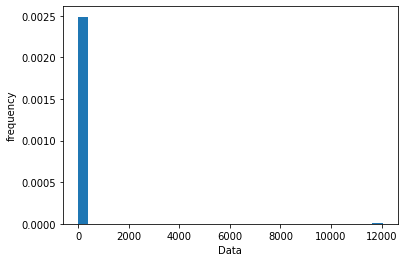

In [78]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

x = pdays_20[pdays_20['main_diagnosis_L2'] == 'I20-I25']['days_in_hospital']

plt.hist(x, density=True, bins=30)  # density=False would make counts
plt.ylabel('frequency')
plt.xlabel('Data')

In [79]:
pdays_20['days_in_hospital']

0         5.0
1         5.0
2         5.0
3         5.0
4         5.0
         ... 
465908    8.0
465909    8.0
465910    8.0
465911    8.0
465912    8.0
Name: days_in_hospital, Length: 423975, dtype: float64

In [80]:
x = pdays_20[pdays_20['main_diagnosis_L2'] == 'I20-I25']['days_in_hospital']

In [81]:
x

220       10.0
221       10.0
222       10.0
223       10.0
224       10.0
          ... 
465782     2.0
465783     2.0
465853    12.0
465854    12.0
465855    12.0
Name: days_in_hospital, Length: 35665, dtype: float64

In [86]:
pdays20_heart = pdays_20[pdays_20['main_diagnosis_L2'] == 'I20-I25']

In [87]:
pdays20_heart_above100 = pdays20_heart[pdays20_heart['days_in_hospital'] >= 100]

In [90]:
pdays20_heart_above100.drop_duplicates(subset = 'code_of_entry')

,Date,code_of_entry,Hospital,ЄДРПОУ,дата введення форми 066/o в систему,id,gender,birth date,age in days,hospitalization date,...,HospitalAbb,hospital_id,days_in_hospital,main_diagnosis_L1,main_diagnosis_L1_name,main_diagnosis_L2,main_diagnosis_L2_name,main_diagnosis_L3,main_diagnosis_L3_name,main_diagnosis_name
30048,2020-01-01,11193,"КНП ""ЧУТІВСЬКА ЦЕНТРАЛЬНА РАЙОННА ЛІКАРНЯ""",1999537,2020-04-03,634,1.0,03.11.1973,4885.0,1987-03-20,...,КНП_ЧЦРЛ,634_КНП_ЧЦРЛ,12039.0,I00-I99,ХВОРОБИ СИСТЕМИ КРОВООБІГУ,I20-I25,Ішемічна хвороба серця,I20,Стенокардія (грудна жаба),Нестабільна стенокардія
